## Observations and Insights 

In [30]:
# Observations
#1 Naftisol	has the highest mean tumor volume
#2 Mouse s185's tumor volume decreased over time
#3 Roughly 70% of the Capomulin average tumor volume is explained by the weight of the mouse



In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')



In [2]:
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(combined_data["Mouse ID"].value_counts())



249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_regimen = clean_df.groupby(["Drug Regimen"])

regimen_mean = grouped_regimen["Tumor Volume (mm3)"].mean()
regimen_median = grouped_regimen["Tumor Volume (mm3)"].median()
regimen_variance = grouped_regimen["Tumor Volume (mm3)"].var()
regimen_std = grouped_regimen["Tumor Volume (mm3)"].std()
regimen_sem = grouped_regimen["Tumor Volume (mm3)"].sem()

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

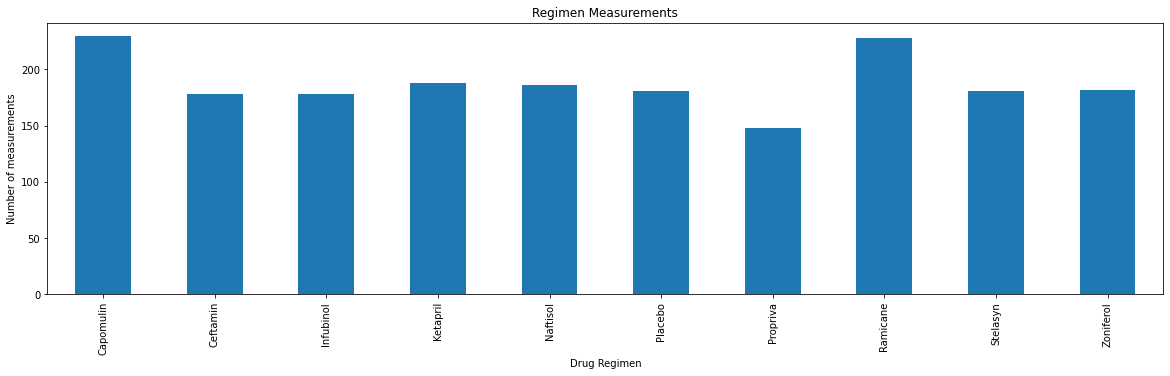

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_count

regimen_count.plot(kind="bar", figsize=(20,5))

#set chart title
plt.title("Regimen Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of measurements")

#show chart and set layout
plt.show()
plt.tight_layout()



In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Number of measurements')

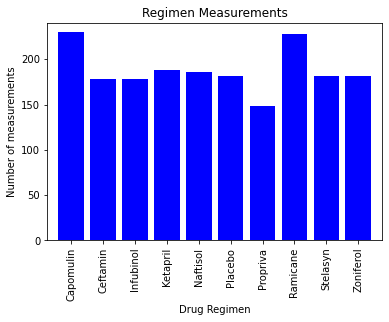

In [12]:
users = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(regimen_count))

plt.bar(x_axis, users, color='b', alpha=1, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Regimen Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of measurements")

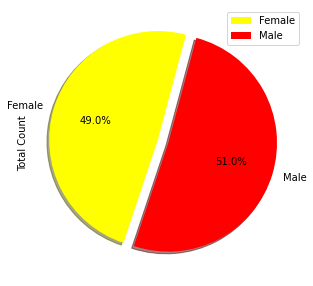

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = clean_df.groupby(["Sex"]).count()["Mouse ID"]
sex_df = pd.DataFrame(sex_count)
sex_df.columns = ["Total Count"]
sex_df["Percentage of Sex"] = (100*(sex_df["Total Count"]/sex_df["Total Count"].sum()))
sex_df

colors = ['yellow', 'red']
explode = (0.1, 0)
plot = sex_df.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=75, explode = explode, shadow = True, autopct="%1.1f%%")



(-1.2128639238082213,
 1.1091177556002698,
 -1.106700641755685,
 1.1034697461867102)

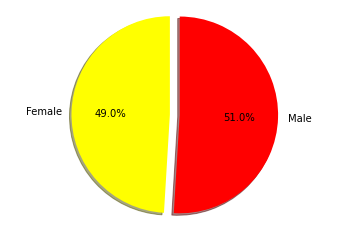

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

sex_df

sizes = [49.042553,50.957447]

colors = ['yellow', 'red']

explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis("equal")



## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint'] 
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merged = pd.merge(Capomulin_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")

Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint'] 
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merged = pd.merge(Ramicane_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")

Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint'] 
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merged = pd.merge(Infubinol_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")

Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint'] 
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merged = pd.merge(Ramicane_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")








In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capomulin_tumor_vol = Capomulin_merged["Tumor Volume (mm3)"]

quartiles =Capomulin_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [17]:
Ramicane_tumor_vol = Ramicane_merged["Tumor Volume (mm3)"]

quartiles =Ramicane_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [18]:
Ceftamin_tumor_vol = Ceftamin_merged["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [19]:
Infubinol_tumor_vol = Infubinol_merged["Tumor Volume (mm3)"]

quartiles = Infubinol_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


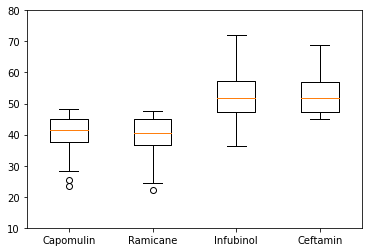

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

treatment_lists = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
treatment_list_df = pd.DataFrame(treatment_lists)
treatment_list_df = treatment_list_df.reindex(treatments)
treatment_vols = [vol for vol in treatment_list_df['Tumor Volume (mm3)']]
plt.boxplot(treatment_vols, labels=treatments)
plt.ylim(10, 80)
plt.show()


## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [22]:
s185_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "s185",:]
s185_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


Text(0, 0.5, 'Tumor Volume (mm3)')

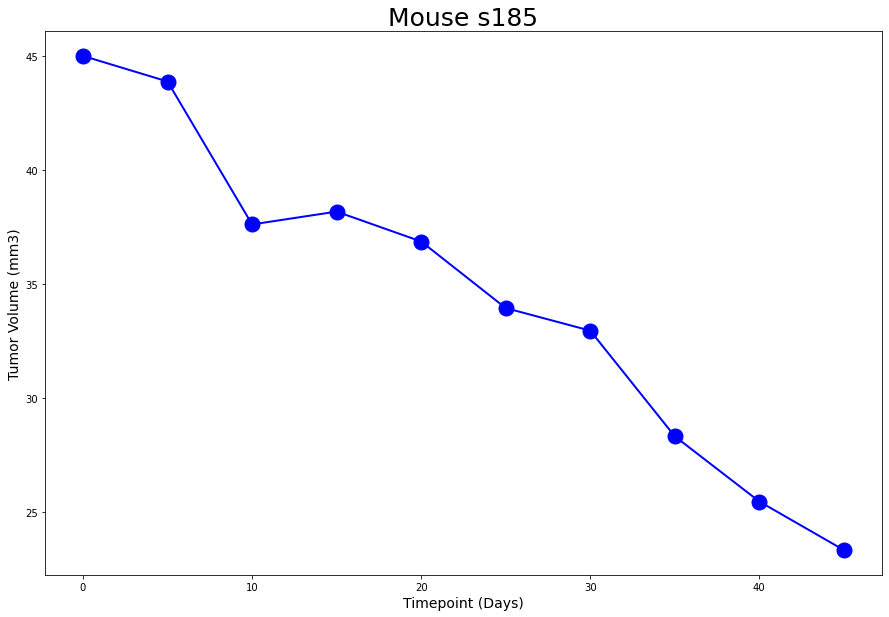

In [26]:
x_axis = s185_df["Timepoint"]
s185 = s185_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Mouse s185',fontsize =25)
plt.plot(x_axis, s185,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)


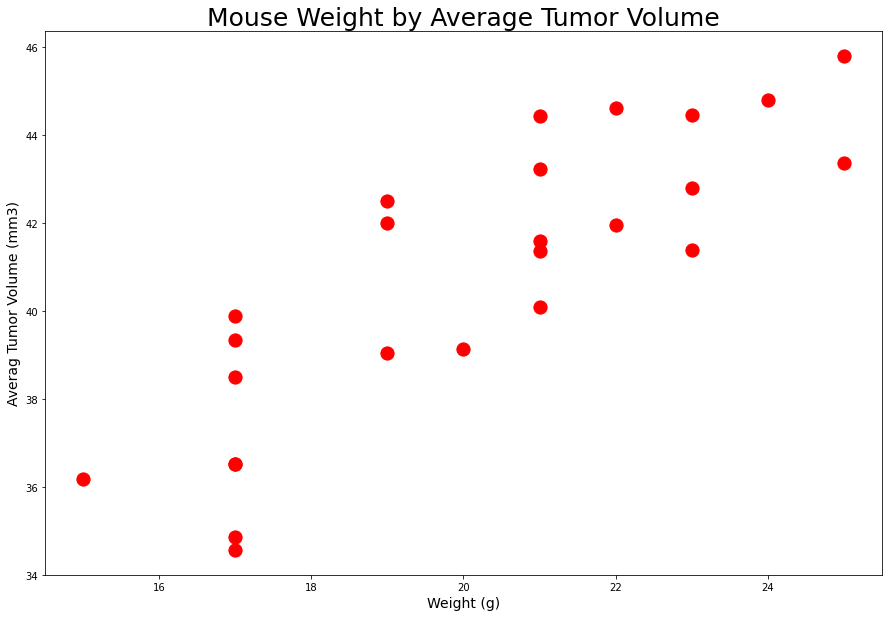

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'],s=175, color="red")
plt.title('Mouse Weight by Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)


plt.show()


## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [31]:
x_values = avg_vol['Weight (g)']
y_values = avg_vol['Tumor Volume (mm3)']

corr=round(st.pearsonr(x_values,y_values)[0],2)

print(f"The correlation coefficient is {corr}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

The correlation coefficient is 0.84
slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


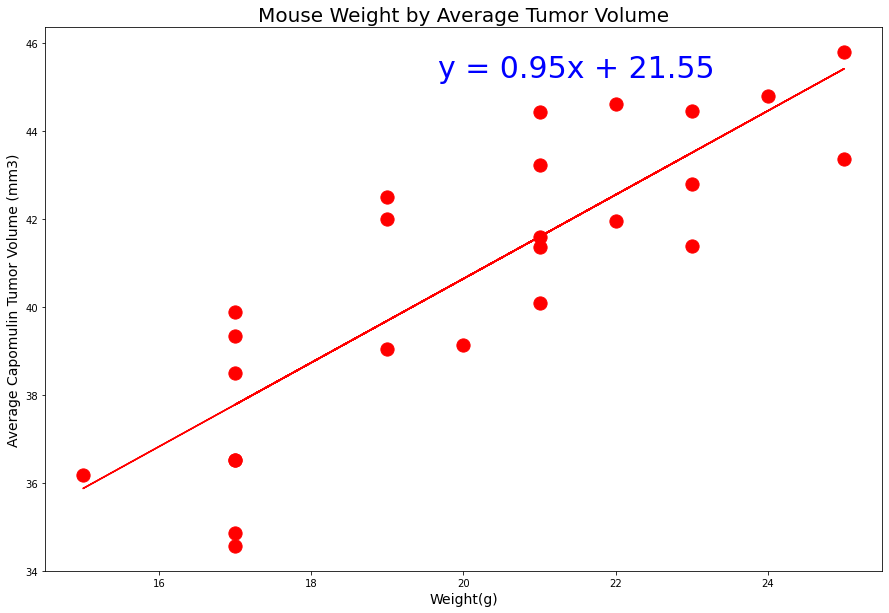

In [38]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="red")
plt.plot(x_values,regress_values,"r-")
plt.title('Mouse Weight by Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Capomulin Tumor Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="blue")

print(f"The r-squared is: {rvalue**2}")